# Guía de ejercicios

Ejercicios de aplicación de NumPy aplicados a Ingeniería de Features y Regresión Lineal.

In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
import os
import matplotlib.pyplot as plt
from numpy.lib.recfunctions import unstructured_to_structured
from abc import ABC, abstractmethod

## Ejercicio #1. Normalización
Dado un dataset X de n muestras y m features, implementar un método en numpy para normalizar con z-score.

In [ ]:
def custom_normalize(X: np.ndarray):
    x_mean = np.mean(X, axis=0)
    x_std = np.std(X, axis=0)

    Z = (X - x_mean)/x_std

    return Z

In [ ]:
n = 100 
m = 3

X_test = np.random.normal(loc=[i for i in range(m)], scale=[i+2 for i in range(m)], size=(n,m))
print("mean: \n", X_test.mean(axis=0))
print("std: \n", X_test.std(axis=0))

In [ ]:
X_test_norm = custom_normalize(X_test)
print("mean norm: \n", X_test_norm.mean(axis=0))
print("std norm: \n", X_test_norm.std(axis=0))

## Ejercicio #2. Remover filas y columnas con NaNs en un dataset
Dado un dataset, hacer una función que, utilizando numpy, filtre las columnas y las filas que tienen NaNs.

In [ ]:
def remove_cols_nan(X: np.ndarray):
    return X[:, ~np.isnan(X).any(axis=0)]

def remove_rows_nan(X: np.ndarray):
    return X[~np.isnan(X).any(axis=1), :]

In [ ]:
X_test_nan = X_test.copy()

n_nan = 10
X_test_nan.ravel()[np.random.choice(X_test_nan.size, n_nan, replace=False)] = np.nan
print(X_test_nan[:10])

In [ ]:
X_test_nan_1 = remove_cols_nan(X_test_nan)
print("Removing cols: \n", X_test_nan_1)
X_test_nan_2 = remove_rows_nan(X_test_nan)
print("Removing rows: \n", X_test_nan_2)

## Ejecicio #3: Reemplazar NaNs por la media de la columna
Dado un dataset, hacer una función que utilizando numpy reemplace los NaNs por la media de la columna.

In [ ]:
def replace_nan_with_mean(X: np.ndarray):
    x_mean = np.nanmean(X, axis=0)
    return np.nan_to_num(X, nan=x_mean)

In [ ]:
replace_nan_with_mean(X_test_nan)[:10]

## Ejecicio #4: Dado un dataset X separarlo en 70 / 20 / 10
A partir de utilizar np.random.permutation, hacer un método que dado un dataset, devuelva los 3 datasets como nuevos numpy arrays.

In [ ]:
def split_dataset(X: np.ndarray, train: float = 0.7, val: float = 0.2, test: float = 0.1):
    total_len = len(X)
    train_len = int(train * total_len)
    val_len = int(val * total_len)

    X = np.random.permutation(X)

    X_train = X[:train_len]
    X_val = X[train_len:train_len+val_len]
    X_test = X[train_len+val_len:]

    return X_train, X_val, X_test

In [ ]:
train, val, test = split_dataset(X_test)

In [ ]:
print("X shape:", X_test.shape)
print("X train shape:", train.shape)
print("X val shape:", val.shape)
print("X test shape:", test.shape)

## Ejercicio #5: A partir del dataset de consigna, aplicar los conceptos de regresión lineal.

1. Armar una clase para cargar el dataset en un ndarray estructurado, tal como se realizó en el ejercicio 10 de la Clase 1.
2. Incluir un método split a la clase para obtener los sets de training y test.
3. Crear una clase métrica base y una clase MSE (Error cuadrático medio) que herede de la clase base.
4. Crear una clase modelo base y clases regresión lineal y regresión afín que hereden de la primera. Usar los conocimientos teóricos vistos en clase.
5. Hacer un fit de las regresiones con los datos de entrenamiento.
6. Hacer un predict sobre los datos de test y reportar el MSE en cada caso.
7. Graficar la curva obtenida.

In [ ]:
class DataHandler(object):
    __instance = None

    def __new__(cls, *args, **kwargs):
        if DataHandler.__instance is None:
            DataHandler.__instance = object.__new__(cls)

        return DataHandler.__instance

    def __init__(self, path, dtypes):
        super().__init__()
        self.path = path
        self.dtypes = dtypes
        self.pickle_file = self.path.rsplit('.', 1)[0] + ".pkl"
        if os.path.exists(self.pickle_file):
            self.upload_pickle()
        else:
            self.upload_csv()
    
    def upload_pickle(self):
        print("Uploading pickle")
        with open(self.pickle_file,'rb') as f:
            self.data = pickle.load(f)
    
    def upload_csv(self):
        print("Uploading csv")
        dataset = np.genfromtxt(self.path, delimiter=",", skip_header=1)
        self.data = unstructured_to_structured(dataset, dtype=np.dtype(self.dtypes))
        with open(self.pickle_file,'wb') as f:
            pickle.dump(self.data, f)

    def split_dataset(self, train: float = 0.7, val: float = 0.2, test: float = 0.1):
        total_len = len(self.data)
        train_len = round(train * total_len)
        val_len = round(val * total_len)

        X = np.random.permutation(self.data)

        X_train = X[:train_len]
        X_val = X[train_len:train_len+val_len]
        X_test = X[train_len+val_len:]

        return X_train, X_val, X_test


In [207]:
datapath = "./data/income.csv"
datatypes = [("income", 'float64'), ("happiness", 'float64')]

data_handler = DataHandler(path=datapath, dtypes=datatypes)
train, validation, test = data_handler.split_dataset(0.8, 0.1, 0.1)

print("dataset shape:", data_handler.data.shape)
print("train set shape:", train.shape)
print("validation set shape:", validation.shape)
print("test set shape:", test.shape)

Uploading pickle
dataset shape: (498,)
train set shape: (398,)
validation set shape: (50,)
test set shape: (50,)


In [208]:
train[:5]

array([(0, 6.27926507, 4.23499122), (0, 4.92494969, 3.09216465),
       (0, 6.54098836, 5.71380229), (0, 4.22355358, 2.29570014),
       (0, 2.30719771, 3.50960469)],
      dtype=[('f0', '<u8'), ('income', '<f8'), ('happiness', '<f8')])

In [209]:
training_set = train.view('<f8').reshape(train.shape[0], 3)
training_set[:5]

array([[0.        , 6.27926507, 4.23499122],
       [0.        , 4.92494969, 3.09216465],
       [0.        , 6.54098836, 5.71380229],
       [0.        , 4.22355358, 2.29570014],
       [0.        , 2.30719771, 3.50960469]])

In [186]:
class BaseMetric:
    def __init__(self, **kwargs):
        self.truth = kwargs.get("truth", [])
        self.prediction = kwargs.get("prediction", [])

class MSE(BaseMetric):
    def __call__(self):
        print("MSE __call__")
        #for i in range(self.truth.shape[0]):
        #    print(self.truth[i], self.prediction[i])
        return 1 / len(self.truth) * np.sum((self.truth - self.prediction) ** 2)

In [211]:
class BaseModel(ABC):
    def __init__(self, train, val, test):
        super().__init__()
        self.training_set = train
        self.validation_set = val
        self.test_set = test
        self.num_col = len(train[0])
    
    @abstractmethod
    def fit(self):
        pass

    @abstractmethod
    def predict(self):
        pass

class LinearRegressor(BaseModel):
    def fit(self):
        # Convert np.void arrays to structured data
        training_set = self.training_set.view('<f8').reshape(self.training_set.shape[0], self.num_col)

        # Get data and labels
        y = training_set[:, -1]
        X = training_set[:, 1:-1]

        # Add column vector of ones to X
        X = np.c_[X, np.ones(len(X))]

        # Obtain w and b
        model = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

        self.b = model[-1]
        self.w = model[:-1]

        return

    def predict(self):
        # Convert np.void arrays to structured data
        test_set = self.test_set.view('<f8').reshape(self.test_set.shape[0], self.num_col)
        y = test_set[:, -1]
        X = test_set[:, 1:-1]

        return X.dot(self.w) + self.b

In [212]:
lin_reg = LinearRegressor(train, validation, test)
lin_reg.fit()

In [213]:
error = MSE(truth=test["happiness"], prediction=lin_reg.predict())()
print("MSE: ", error)

MSE __call__
MSE:  0.5981736849796397


In [219]:
print(lin_reg.b)
print(lin_reg.w)

0.2730270352044708
[0.70325468]


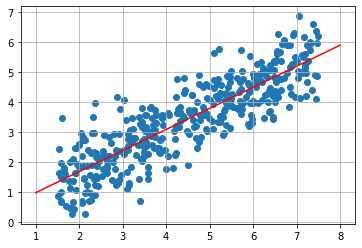

In [220]:
plt.scatter(train["income"], train["happiness"])
x_val = np.arange(1, 9)
lin_reg = lin_reg.w * x_val + lin_reg.b 
plt.plot(x_val, lin_reg, 'r')
plt.grid()